**DATS 6401 - Final Project - Purvi Thakor**

**Airline Travel Safety for Pets**

With the recent news surfacing about pet deaths/accidents during air travel, out of curiosity I did a bit of research and found out that Pet Travel Incident reporting started in 2005 in the US. Since then, there have been monthly airline reports about the loss, injury, or death of animals during air transportation. These reports contain the type and cause of incidents, incident dates, airline names, type of animals and other related information. My goal is to uncover the statistics behind Pet Travel safety across different airlines in the US and visualize them for a better and simpler understanding.



In [1]:
#import all the relevant packages

import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup as bs
from warnings import warn
from IPython.core.display import clear_output
from time import time
from time import sleep
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly
import plotly.offline as py #dont know
import plotly.plotly as py #used
# !pip install cufflinks
import cufflinks as cf
import plotly.graph_objs as go
from plotly import tools

# py.init_notebook_mode(connected = True)
# plotly.tools.set_credentials_file(username='Purvi_Thakor', api_key='IQOuptfQl29GCSaKVLnK')


Data is available on [DOT Website](https://www.transportation.gov/aviation) & on [PetFlight](http://www.petflight.com)

Since, extracting data from pdfs seemed a bit difficult I decided to use BeautifulSoup to extract data from Petflight's website. The code ran for 2 hours and I saved the ouput in a CSV to use it for my analysis.

In [2]:
# Use beautiful soup to extract all the URLs that have information

url = "http://www.petflight.com/pet-incidents/list"
r=requests.get(url)
soup = bs(r.content, 'lxml')


#extract all "details" urls listed on http://www.petflight.com/pet-incidents/list
all_links=[]
for link in soup.find_all("a"):
    if "pet-incidents" in link.get("href") and 'Details' in link.text:
        all_links.append("http://www.petflight.com%s" %(link.get("href")))


## 597 entires listed on http://www.petflight.com/pet-incidents/list. As of 10th April, 2018
# print(len(all_links))


In [3]:
########################## BeautifulSoup code. Runs for ~2 hours

#This code ran for 2 hours when I first extracted the data. Hence, I've extracted all the data in a CSV.

# airlines, incident_dates,report_dates,incident_types,animals,brachycephalics,ages,flight_numbers,orig_airports,dest_airports,reporting_airports= ([] for i in range(11))

# # Preparing the monitoring of the loop
# start_time = time()
# request_monitor = 0


# for link in all_links:
#     r=requests.get(link)
    
#     # Pause the loop
#     sleep(randint(8,15))
    
#     # Monitor the requests
#     request_monitor += 1
#     elapsed_time = time() - start_time
#     print('Request:{}; Frequency: {} requests/s'.format(request_monitor, request_monitor/elapsed_time))
#     clear_output(wait = True)
    
# # Throw a warning for non-200 status codes
#     if r.status_code != 200:
#         warn('Request: {}; Status code: {}'.format(request_monitor, r.status_code))

#     # Break the loop if the number of requests is greater than expected
#     if request_monitor > 597:
#         warn('Number of requests was greater than expected.')  
#         break 

#     soup = bs(r.content, 'lxml')
    
#     p_tag = soup.find_all('p')
        
#     rows = soup.find_all('strong')  
    
#     airlines.append(rows[0].text)
#     incident_dates.append(rows[1].text)
#     report_dates.append(rows[2].text)
#     incident_types.append(rows[3].text)
#     animals.append(rows[4].text)
#     brachycephalics.append(rows[5].text)
#     ages.append(rows[6].text)
#     flight_numbers.append(rows[7].text)
#     orig_airports.append(rows[8].text)
#     dest_airports.append(rows[9].text)
#     reporting_airports.append(rows[10].text)

    
# data_all_links = pd.DataFrame({'Airline': airlines,
#                        'Incident Date': incident_dates,
#                        'Report Date': report_dates,
#                        'Incident Type': incident_types,
#                        'Animal': animals,
#                         'Brachycephalic': brachycephalics,
#                         'Animal Age': ages,
#                         'Flight Number': flight_numbers,
#                         'Originating Airport': orig_airports,
#                         'Destination Airport': dest_airports,
#                         'Reporting Airport': reporting_airports,
#                        })
# data_all_links


#OUTPUT to a CSV
# data_all_links.to_csv('D:\Spring 2018\Visualization of Complex Data - Nima Zahadat\Final project\WIP\web_scraped_data_597_links.csv')





Read the CSV to begin analysis:

In [4]:
#reading the csv since the actual code takes 2 hours to extract data from 597 links

data_all_links= pd.read_csv("D:\Spring 2018\Visualization of Complex Data - Nima Zahadat\Final project\WIP\Data\web_scraped_data_597_links.csv")
data_all_links.rename(columns={'Animal Age': 'Animal_Age', 'Destination Airport': 'Destination_Airport', 'Flight Number':'Flight_Number','Incident Date':'Incident_Date','Incident Type':'Incident_Type','Originating Airport':'Originating_Airport','Report Date':'Report_Date' ,'Reporting Airport':'Reporting_Airport'}, inplace=True)
data_all_links.head()


,Airline,Animal,Animal_Age,Brachycephalic,Destination_Airport,Flight_Number,Incident_Date,Incident_Type,Originating_Airport,Report_Date,Reporting_Airport
0,Delta,Cat,Not reported,No,SAT,NaN,23-Dec-16,Injury,PDX,16-Feb,PDX
1,United Airlines,Dog,8 years,Yes,NaN,UA396,29-Sep-17,Injury,NaN,17-Nov,SFO
2,United Airlines,Dog,4 years,Yes,ORD,UA1562,26-Sep-17,Injury,ANC,17-Nov,ANC
3,American Airlines,Dog,Not reported,No,NaN,AA1129,12-Sep-17,Injury,NaN,17-Nov,NaN
4,United Airlines,Dog,Not reported,No,AUS,UA1917,11-Sep-17,Injury,NaN,17-Nov,AUS


In [5]:
data_all_links.dtypes

Airline                object
Animal                 object
Animal_Age             object
Brachycephalic         object
Destination_Airport    object
Flight_Number          object
Incident_Date          object
Incident_Type          object
Originating_Airport    object
Report_Date            object
Reporting_Airport      object
dtype: object

In [6]:
type(data_all_links)

pandas.core.frame.DataFrame

In [7]:
data_all_links.shape

(597, 11)

In [8]:
#convert Incident Date column to proper format

import datetime
##data_all_links['Incident Date'] =datetime.datetime.strptime(str(data_all_links['Incident Date']),"%m/%d/%Y").strftime('%m/%d/%Y')
##at=str(pd.to_datetime(data_all_links['Incident Date']))
data_all_links['Incident_Date'] = pd.to_datetime(data_all_links['Incident_Date'])
data_all_links.dtypes

Airline                        object
Animal                         object
Animal_Age                     object
Brachycephalic                 object
Destination_Airport            object
Flight_Number                  object
Incident_Date          datetime64[ns]
Incident_Type                  object
Originating_Airport            object
Report_Date                    object
Reporting_Airport              object
dtype: object

In [9]:
data_all_links.head()

,Airline,Animal,Animal_Age,Brachycephalic,Destination_Airport,Flight_Number,Incident_Date,Incident_Type,Originating_Airport,Report_Date,Reporting_Airport
0,Delta,Cat,Not reported,No,SAT,NaN,2016-12-23,Injury,PDX,16-Feb,PDX
1,United Airlines,Dog,8 years,Yes,NaN,UA396,2017-09-29,Injury,NaN,17-Nov,SFO
2,United Airlines,Dog,4 years,Yes,ORD,UA1562,2017-09-26,Injury,ANC,17-Nov,ANC
3,American Airlines,Dog,Not reported,No,NaN,AA1129,2017-09-12,Injury,NaN,17-Nov,NaN
4,United Airlines,Dog,Not reported,No,AUS,UA1917,2017-09-11,Injury,NaN,17-Nov,AUS


In [10]:
data_all_links.dtypes

Airline                        object
Animal                         object
Animal_Age                     object
Brachycephalic                 object
Destination_Airport            object
Flight_Number                  object
Incident_Date          datetime64[ns]
Incident_Type                  object
Originating_Airport            object
Report_Date                    object
Reporting_Airport              object
dtype: object

According to the data, from 2015-2017 Delta, United and Alaska Airlines have reported the highest number of incidents.

The incidents could be Injuries, Losses or even Deaths of pets flying with the airlines.

In [11]:
#Count of accidents reported by airline names

no_of_accidents = data_all_links.Airline.value_counts().reset_index().rename(columns={'index': 'Airline Name', 'Airline': 'count'})
no_of_accidents

,Airline Name,count
0,Delta,132
1,United Airlines,131
2,Alaska Airlines,112
3,American Airlines,74
4,Continental,68
5,Hawaiian Air,24
6,Northwest Airlines,16
7,SkyWest,10
8,Horizon Air,8
9,Midwest Airlines,4


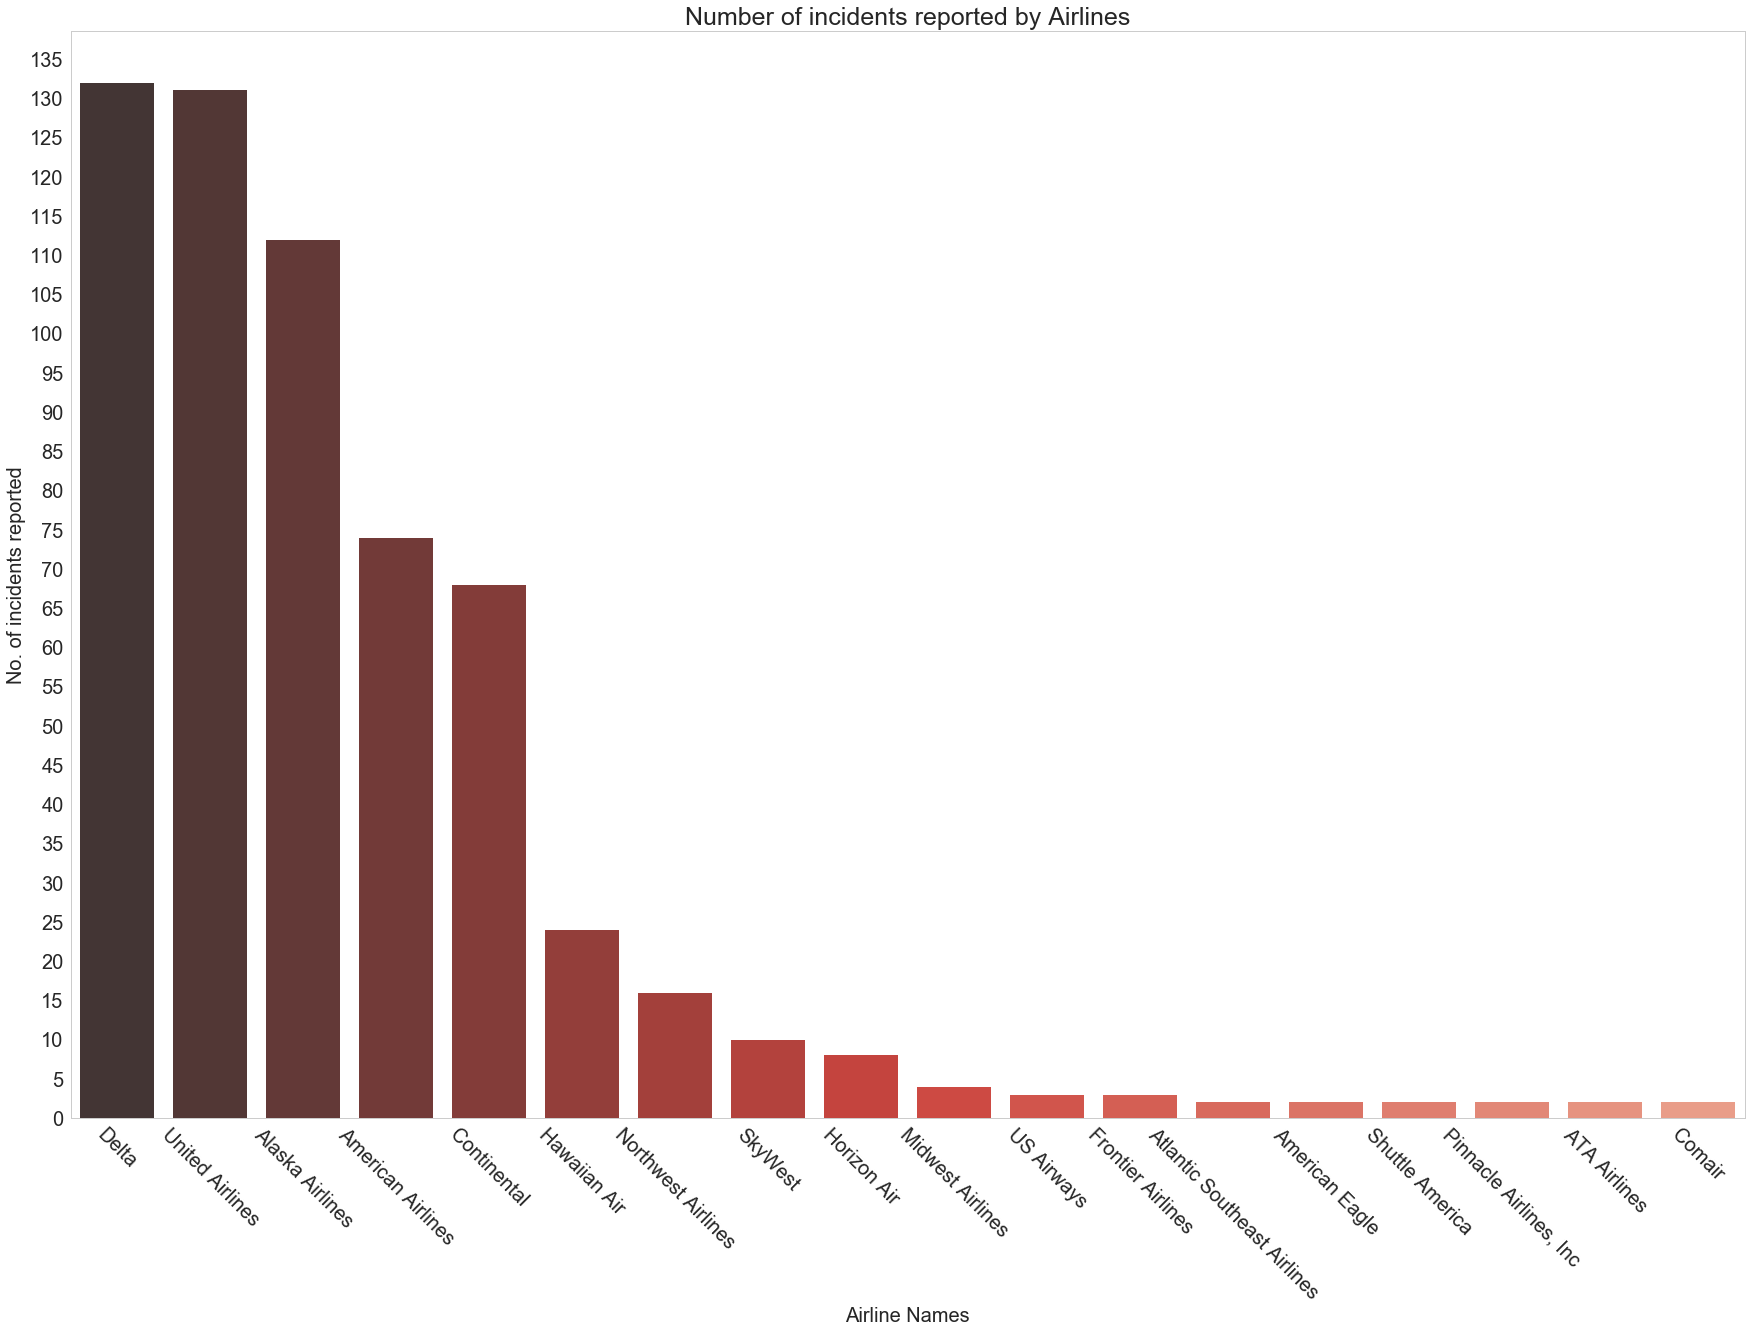

In [12]:

#Count of accidents reported by airline names # Visually

# plt.ylim(0, 135)
# sns.plt.ylim(0, 132)
sns.set_style("whitegrid")

plt.figure(figsize=(30,20))
plt.title("Number of incidents reported by Airlines",  fontsize=25)
g=sns.barplot(data=no_of_accidents, x = 'Airline Name', y='count', palette="Reds_d")
g.set_yticks(np.arange(0,140,5))
# g.set_xticklabels(rotation=-30)
plt.xticks(rotation=-45,  fontsize=20)
plt.yticks(  fontsize=20)
plt.grid(False)
plt.xlabel('Airline Names', fontsize=20)
plt.ylabel('No. of incidents reported', fontsize=20)
g

# sns.despine()
# plt.tight_layout()



Percentage of different incidents reported by the top 5 Airlines.

Even though Delta & United have more number of total incidents reported, when it comes to percentage divisions, American & Continental Airlines top the list with deaths accounting to 76% of their reportings.


In [13]:
#which incidents are higher in which airlines (TOP 5 airlines with the most number of reported incidents)


airline_incidents = pd.crosstab(data_all_links.Airline, data_all_links.Incident_Type)
airline_incidents.columns = ['Death', 'Injury', 'Loss']
airline_incidents= airline_incidents.reset_index()
airline_incidents['Total'] = airline_incidents.sum(axis = 1)
airline_incidents = airline_incidents.sort_values(by='Total', ascending = False)
airline_incidents = airline_incidents.set_index('Airline')


airline_incidents['Death%'] = np.round((airline_incidents['Death'] / airline_incidents['Total'] *100),0)
airline_incidents['Injury%'] = np.round((airline_incidents['Injury'] / airline_incidents['Total'] *100),0)
airline_incidents['Loss%'] = np.round((airline_incidents['Loss'] / airline_incidents['Total'] *100),0)
airline_incidents

## airline_incidents.drop('Total', axis=1, inplace= True)


airline_incidents = airline_incidents.filter(['Death%', 'Injury%','Loss%'], axis=1)


airline_incidents=airline_incidents.head(5)
print(airline_incidents)


airline_incidents.iplot(kind='bar', colors=['brightred', 'darkorange', 'coral'], title="Type of incidents reported by the top 5 airlines", xTitle="Airlines", yTitle="Percentage" )

#### alternative in matplotlib
## airline_incidents.plot(kind='barh', figsize = (20,10),title='Airlines & incident types\n\n')
## # plt.ylabel("Percentage of GDP")
## # plt.xlabel("Years")
## plt.grid()
## plt.show()





                   Death%  Injury%  Loss%
Airline                                  
Delta                65.0     24.0   11.0
United Airlines      59.0     34.0    8.0
Alaska Airlines      38.0     56.0    6.0
American Airlines    76.0     15.0    9.0
Continental          75.0     16.0    9.0


Even though Seattle International Airport is not as busy as Atlanta, it has reported the most number of incidents.

Below is a word cloud shaped as the US map which shows the airports that have reported most number of incidents.

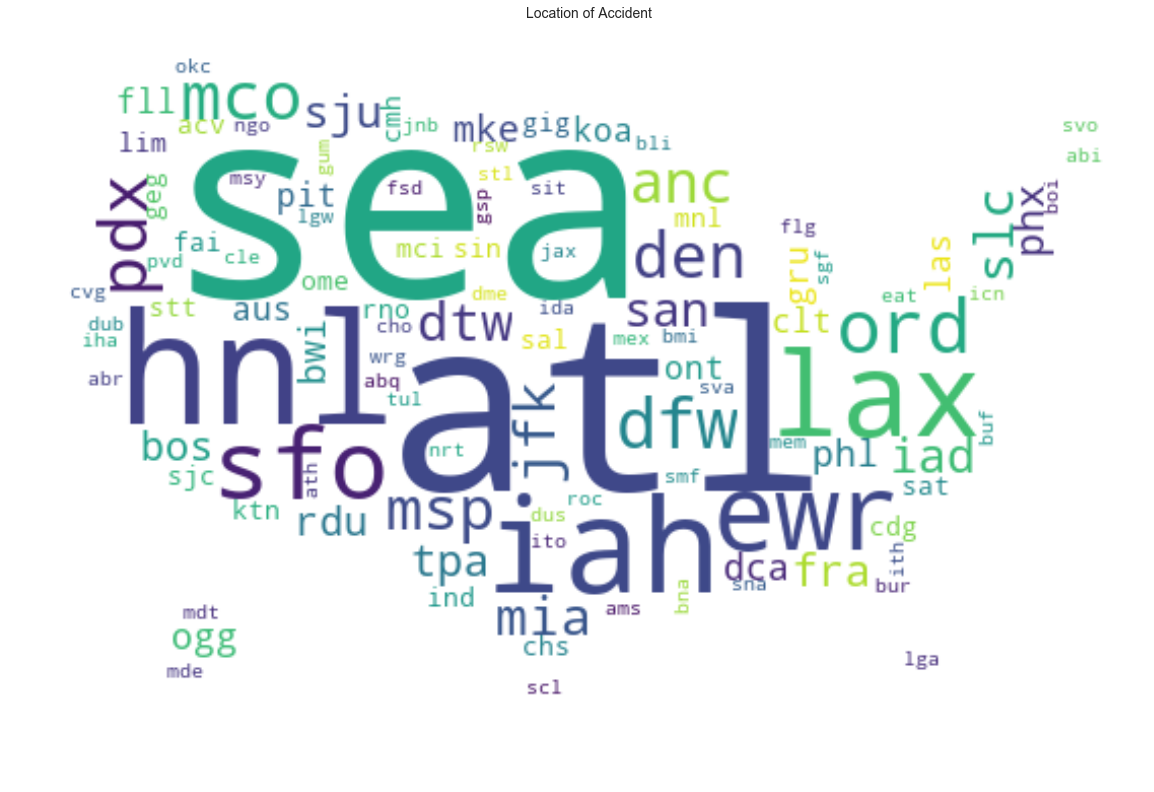

In [14]:
#create a word cloud of all the airport names

# !pip install wordcloud
# !pip install pillow


from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# from collections import Counter

stopwords = set(STOPWORDS)
stopwords.add("NaN")
stopwords.add("nan")
stopwords.add("0")
# stopwords.add("random")

text = str(data_all_links.Reporting_Airport.tolist())
text = text.lower()
text = text.replace("'", "")



globe_mask = np.array(Image.open("D:\\Spring 2018\\Visualization of Complex Data - Nima Zahadat\\Final project\\WIP\\Data\\usa-map.jpg"))



wc = WordCloud(background_color="white", mask=globe_mask, stopwords=stopwords, random_state=42).generate(text)
           


plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Location of Accident', loc='Center', fontsize=14)
plt.show()



A better way to look at this data is on a map. I've used the Folium library to plot these airports.

The radius of the circle determines the number of incidents reported by these airports.

In [15]:
# folium for reporting airports with the number of incidents

# data_all_links.head()
airports = data_all_links.Reporting_Airport.value_counts().reset_index().rename(columns={'index': 'Airport_Code', 'Reporting_Airport': 'count'})

# airports


In [16]:
#Read in the latitudes and longitudes file

lat_lon = pd.read_csv("D:/Spring 2018/Visualization of Complex Data - Nima Zahadat/Final project/WIP/Data/Airport_Codes_mapped_to_Latitude_Longitude_in_the_United_States.csv")
lat_lon.rename(columns={'locationID': 'Airport_Code'}, inplace=True)
lat_lon.head()

#merging the lat/long with airport codes
map_data = pd.merge(left = airports, right = lat_lon, left_on = 'Airport_Code', right_on = 'Airport_Code')
map_data.head()


,Airport_Code,count,Latitude,Longitude
0,SEA,66,47.4500,-122.3117
1,ATL,54,33.6367,-84.4281
2,HNL,30,21.3187,-157.9225
3,LAX,29,33.9425,-118.4072
4,IAH,29,29.9844,-95.3414


In [17]:
#!pip install folium
import folium
from IPython.display import display
from folium import plugins

map_data['count'] = map_data['count'].astype(float)
map_data

#centering the map on US center
world_map = folium.Map(location=[39.809860,-98.555183], tiles="Mapbox Bright", zoom_start=4)    

plugins.Fullscreen(position='topright',title='Expand me',title_cancel='Exit me',force_separate_button=True).add_to(world_map)

for i in range(0,len(map_data)):
    folium.Circle(
        location=[map_data.iloc[i]['Latitude'], map_data.iloc[i]['Longitude']],
        radius= map_data.iloc[i]['count']*2500,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(world_map)  
        
display(world_map)      



Out of the 597 reports that I have extracted, death accounts to the highest percentage. Injuries occur when pets try to get out of the cage & hurt themselves. Losses occur when pets manage to escape from their cages when they are being transported from the Cargo facility to the Aircraft for loading.

In [18]:
# number of incidents reported in various categories

no_of_incidents = data_all_links.Incident_Type.value_counts().reset_index().rename(columns={'index': 'Incident', 'Incident_Type': 'count'})
# print(no_of_incidents)
total_incidents = no_of_incidents['count'].sum()
total_incidents

no_of_incidents['Percentage'] = np.round((no_of_incidents['count'] / total_incidents*100),2)
no_of_incidents

,Incident,count,Percentage
0,Death,348,58.29
1,Injury,190,31.83
2,Loss,59,9.88


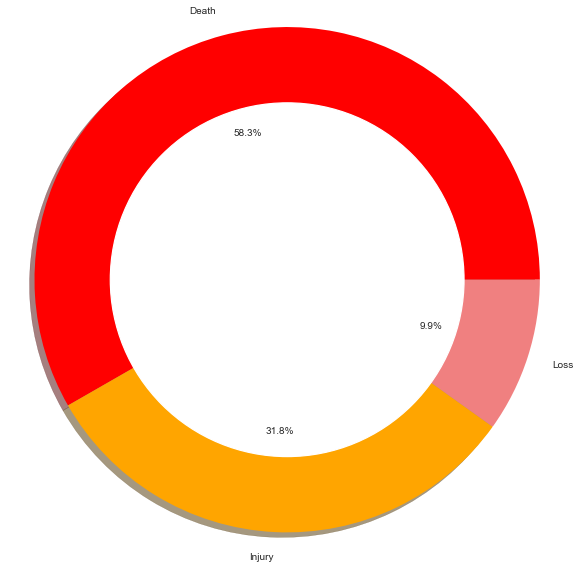

In [19]:
# donut chart to show number of incidents reported in various categories

# The slices will be ordered and plotted counter-clockwise.

plt.subplots(figsize=(10, 10))
explode = (0, 0, 0)  

plt.pie(no_of_incidents['Percentage'],labels = no_of_incidents['Incident'] , explode=explode, colors=['red', 'orange', 'lightcoral'],
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.7,color='white', fc='white',linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

Extract Years and Months from the Incident Dates

In [20]:
data_all_links['Incident_Year'] = data_all_links['Incident_Date'].dt.year
data_all_links['Incident_Month'] = data_all_links['Incident_Date'].dt.month
data_all_links.head()

,Airline,Animal,Animal_Age,Brachycephalic,Destination_Airport,Flight_Number,Incident_Date,Incident_Type,Originating_Airport,Report_Date,Reporting_Airport,Incident_Year,Incident_Month
0,Delta,Cat,Not reported,No,SAT,NaN,2016-12-23,Injury,PDX,16-Feb,PDX,2016,12
1,United Airlines,Dog,8 years,Yes,NaN,UA396,2017-09-29,Injury,NaN,17-Nov,SFO,2017,9
2,United Airlines,Dog,4 years,Yes,ORD,UA1562,2017-09-26,Injury,ANC,17-Nov,ANC,2017,9
3,American Airlines,Dog,Not reported,No,NaN,AA1129,2017-09-12,Injury,NaN,17-Nov,NaN,2017,9
4,United Airlines,Dog,Not reported,No,AUS,UA1917,2017-09-11,Injury,NaN,17-Nov,AUS,2017,9


Filter to extract data for Spring-Summer & Autumn-Winter

In [21]:
#filter for spring & summer months March to August =>3-8
sprg_sumr = data_all_links.loc[data_all_links['Incident_Month'].isin(['3', '4', '5','6','7', '8'])]  
# sprg_sumr.head()

sprg_sumr = pd.crosstab(sprg_sumr.Incident_Year, sprg_sumr.Incident_Type)
#write to a csv to read in tableau (STACKED CHART IN TABLEAU)
sprg_sumr= sprg_sumr.reset_index()
sprg_sumr

sprg_sumr.to_csv('D:\Spring 2018\Visualization of Complex Data - Nima Zahadat\Final project\WIP\Data\Spring_Summer_1.csv')


# USE TABLEAU INSTEAD
# stacked chart for spring-summer
# ss_chart = pd.crosstab(sprg_sumr.Incident_Year, sprg_sumr.Incident_Type)
# # test = pd.crosstab([data_all_links.Incident_Year,data_all_links.Animal], data_all_links.Incident_Type)
# print(ss_chart)
# ss_chart.plot.barh(stacked=True,  figsize=(20,10))
# plt.title('Spring-Summer Statistics', loc='Center', fontsize=14)




In [22]:
#filter for autumn & winter months Sept to feb =>9,10,11,12,1,2
aut_win = data_all_links.loc[data_all_links['Incident_Month'].isin(['9', '10', '11','12','1', '2'])]  
# aut_win.head()


aw_chart = pd.crosstab(aut_win.Incident_Year, aut_win.Incident_Type)
#write to a csv to read in tableau (STACKED CHART IN TABLEAU)
aw_chart= aw_chart.reset_index()
aw_chart

aw_chart.to_csv('D:\Spring 2018\Visualization of Complex Data - Nima Zahadat\Final project\WIP\Data\Autumn_Winter_1.csv')

# USE TABLEAU INSTEAD
# # stacked chart for autumn-winter

# aw_chart.plot.barh(stacked=True,  figsize=(20,10))
# plt.title('Autumn-Winter Statistics', loc='Center', fontsize=14)

When we talk about pets, we usually think of Cats or Dogs. You would be surprised to know that the data shows that people have flown with many kinds of animals like monekys, birds, rabbits and even snakes! 

But if we look at the overall picture of any year, Dogs & Cats have met with the most number of accidents.

In [23]:
from ipywidgets import widgets
from IPython.display import display

years = (data_all_links['Incident_Year'].unique().tolist())

# years
w = widgets.Dropdown(description="Year", options=years, value = 2005)
display(w)


Dropdown(description='Year', index=12, options=(2016, 2017, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005), value=2005)

In [24]:
#store the value from the drop-down
selection = w.value

animals = data_all_links.loc[data_all_links['Incident_Year'] == selection] 

animals = pd.crosstab(animals.Animal, animals.Incident_Type)
animals.columns = ['Death', 'Injury', 'Loss']
animals= animals.reset_index()
animals['Total'] = animals.sum(axis = 1)
animals = animals.sort_values(by='Total', ascending = False)
animals = animals.set_index('Animal')
animals.drop('Total', axis=1, inplace= True)
# animals

#create a separate dataframe which does not include Dogs & cats
others = animals[2:]
# others


# insert a row with a sum of all columns except for rows dog and cat
animals.loc['Others'] = [others['Death'].sum(), others['Injury'].sum() , others['Loss'].sum() ]
animals= animals.reset_index()
animals = animals.loc[animals['Animal'].isin(['Dog', 'Cat', 'Others'])] 

# Plottting

import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    y=animals['Animal'],
    x=animals['Death'],
    name='Death', orientation = 'h',  marker = dict(color = 'red', line = dict(color = 'red',width = 3))
)

trace2 = go.Bar(
    y=animals['Animal'],
    x=animals['Injury'],
    name='Injury', orientation = 'h', marker = dict(color = 'orange', line = dict(color = 'orange',width = 3))
)

trace3 = go.Bar(
    y=animals['Animal'],
    x=animals['Loss'],
    name='Loss', orientation = 'h', marker = dict(color = 'lightcoral', line = dict(color = 'lightcoral',width = 3))
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

If we look at a split of animals in these reports, it is clear that Dogs have met with the most number of accidents.

In [25]:
#PIE CHART FOR ANIMALS


pie_data = data_all_links.Animal.value_counts().reset_index().rename(columns={'index': 'Animal', 'Animal': 'Count'})
pie_data


pie_data = pie_data.set_index('Animal')




# #create a separate dataframe which does not include Dogs & cats
pie_data_2 = pie_data[2:]
pie_data_2



# # insert a row with a sum of all columns except for rows dog and cat
pie_data.loc['Others'] = [pie_data_2['Count'].sum() ]
pie_data
pie_data= pie_data.reset_index()
pie_data = pie_data.loc[pie_data['Animal'].isin(['Dog', 'Cat', 'Others'])] 

pie_data

,Animal,Count
0,Dog,455
1,Cat,107
13,Others,35


In [26]:
total_incidents
#Calculate percentages
pie_data['Percentage'] = np.round((pie_data['Count'] / total_incidents*100))
pie_data

,Animal,Count,Percentage
0,Dog,455,76.0
1,Cat,107,18.0
13,Others,35,6.0


In [27]:
#Pie chart to show split of animals
pie_values = pie_data['Percentage']
labels = pie_data['Animal']
colors = ['#5D6D7E', '#85929E', '#ACD0F1']

pie_chart = [go.Pie( labels = labels , values=pie_values, hoverinfo='label+percent', textinfo='value' + "%",
              textfont=dict(size=20),   marker=dict( colors = colors,line=dict(color='white', width=2))) ]


fig = dict(data=pie_chart, layout = layout )
py.iplot(fig)


Another important information present in the data was that if the animal was Brachychephalic which means the animal is short-nosed.

Short nosed dog breeeds are more prone to respiratory problems under normal circumstances, and not just in air travel.

In [28]:
#pie chart for Brachycephalic

dogs = pd.crosstab(data_all_links.Animal, data_all_links.Brachycephalic)
dogs.columns = ['No', 'Yes']
dogs = dogs.reset_index()
dogs = dogs.loc[dogs['Animal'] == "Dog"]
dogs['No'] = np.round((dogs['No'] / 455*100))
dogs['Yes'] = np.round((dogs['Yes'] / 455*100))
dogs

,Animal,No,Yes
3,Dog,64.0,36.0


In [29]:

pie_values = ['64', '36']
labels = ['No', 'Yes']
colors = ['#7FBAF0', '#96C4EE']

pie_chart = [go.Pie( labels = labels , values=pie_values, hoverinfo='label+percent', textinfo='value' + "%",
              textfont=dict(size=20),   marker=dict(colors = colors, line=dict(color='white', width=2))) ]

# layout = dict(title = "Split of Medals awarded to " + str(len(initial.Country)) + " countries from 1896 - 2014\n" )                    
fig = dict(data=pie_chart, layout = layout )
py.iplot(fig)


So of all the dogs that were reported with accidents, 36% of them were short-nosed which explains their accidents in-flight!